In [224]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import scipy.stats as stats
import distribution as dist

Medical Access (Updated)

In [225]:
medical_doctors_access_df = pd.read_excel('CSV/access.xlsx') 
medical_doctors_access_df.head()

,Unnamed: 0,Density,Density of nursing and midwifery personnelw (per 10 000 population),Density of dentistsw (per 10 000 population),Density of pharmacistsw (per 10 000 population)
0,Afghanistan,2.5,4.5,0.7,0.3
1,Albania,18.8,60.5,10.3,10.8
2,Algeria,17.2,15.5,3.7,4.5
3,Andorra,33.3,40.1,8.2,10.1
4,Angola,2.1,4.1,0.5,0.7


In [226]:
medical_doctors_access_df[medical_doctors_access_df["Unnamed: 0"] == "United States"].head()

,Unnamed: 0,Density,Density of nursing and midwifery personnelw (per 10 000 population),Density of dentistsw (per 10 000 population),Density of pharmacistsw (per 10 000 population)
185,United States,26.1,156.8,6.1,-


In [227]:
mini_medical_doctors_access_df = medical_doctors_access_df[["Unnamed: 0","Density"]]
mini_medical_doctors_access_df = mini_medical_doctors_access_df[mini_medical_doctors_access_df['Density'].notna()]
mini_medical_doctors_access_df = mini_medical_doctors_access_df[mini_medical_doctors_access_df['Density'] != '-']
mini_medical_doctors_access_df.head()

mini_medical_doctors_access_df["Density"] = mini_medical_doctors_access_df["Density"].apply(lambda x: float(x))

Density
Mean: 19.62291666666667
Std: 17.548654751721383



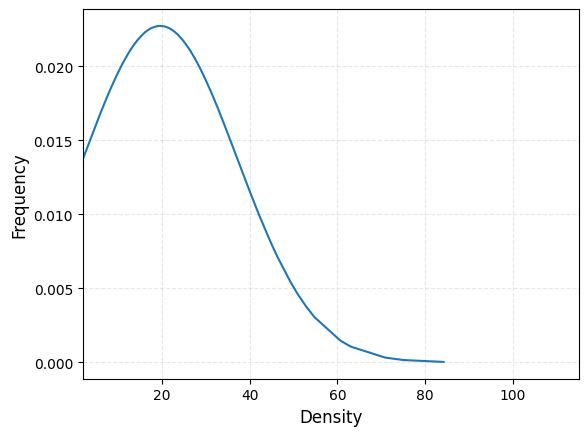

,Unnamed: 0,Density,Doctor Density Scaled
0,Afghanistan,2.5,0.027381
1,Albania,18.8,0.221429
2,Algeria,17.2,0.202381
3,Andorra,33.3,0.394048
4,Angola,2.1,0.022619


In [228]:

density_col = "Density"
density_mean, density_std = dist.dist_info(mini_medical_doctors_access_df, density_col)
dist.dist_plot(mini_medical_doctors_access_df, density_col, density_mean, density_std, 2, 115)
mini_medical_doctors_access_df = dist.add_norm(mini_medical_doctors_access_df, density_col, "Doctor Density Scaled")
mini_medical_doctors_access_df.head()

Under-5 Mortality (Updated)

In [229]:
life_exp_df = pd.read_excel('CSV/WHO22LifeExpectancy&InfantMortality.xlsx') 
life_exp_df.head()

,Unnamed: 0,Life Expectancy for Both Sexes,Under-five mortality ratee (per 1000 live births)
0,Afghanistan,63.2,58
1,Albania,78.0,2
2,Algeria,77.1,2
3,Andorra,NaN,2
4,Angola,63.1,2


Under-five mortality ratee (per 1000 live births)
Mean: 26.675257731958762
Std: 27.169449205688434



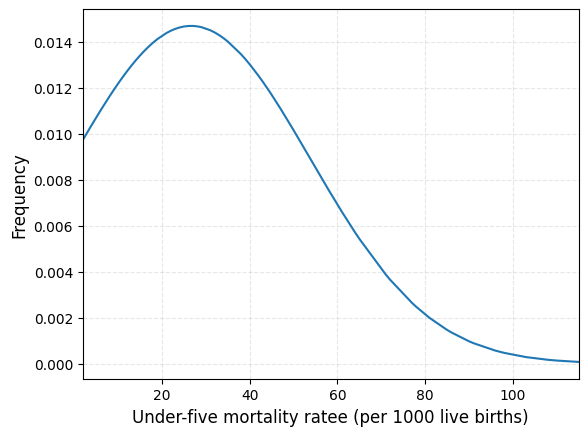

,Unnamed: 0,Life Expectancy for Both Sexes,Under-five mortality ratee (per 1000 live births),Infant Death Scaled
0,Afghanistan,63.2,58,0.495575
1,Albania,78.0,2,0.000000
2,Algeria,77.1,2,0.000000
3,Andorra,NaN,2,0.000000
4,Angola,63.1,2,0.000000


In [230]:
infant_death_col = "Under-five mortality ratee (per 1000 live births)"
infant_death_mean, infant_death_std = dist.dist_info(life_exp_df, infant_death_col)
life_exp_df = life_exp_df[life_exp_df[infant_death_col] < 180]
dist.dist_plot(life_exp_df, infant_death_col, infant_death_mean, infant_death_std, 2, 115)
life_exp_df = dist.add_norm(life_exp_df, infant_death_col, "Infant Death Scaled")
life_exp_df.head()


Life Expectancy (Updated)

Life Expectancy for Both Sexes
Mean: 72.53551912568307
Std: 7.128367384590047



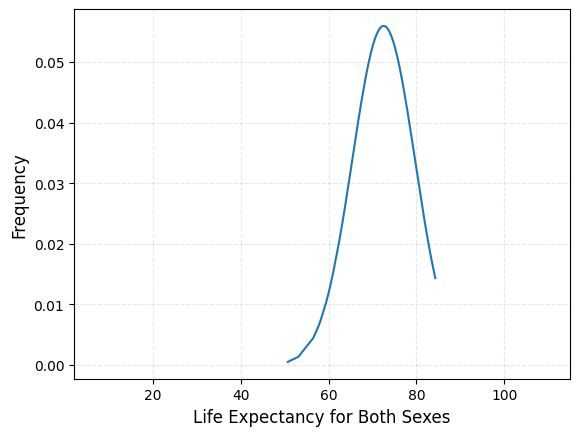

,Unnamed: 0,Life Expectancy for Both Sexes,Under-five mortality ratee (per 1000 live births),Infant Death Scaled,Life Exp Scaled
0,Afghanistan,63.2,58,0.495575,0.372024
1,Albania,78.0,2,0.000000,0.812500
2,Algeria,77.1,2,0.000000,0.785714
3,Andorra,NaN,2,0.000000,NaN
4,Angola,63.1,2,0.000000,0.369048


In [231]:
life_exp_col = "Life Expectancy for Both Sexes"
life_exp_mean, life_exp_std = dist.dist_info(life_exp_df, life_exp_col)
# life_exp_df = life_exp_df[life_exp_df[infant_death_col] < 180]
dist.dist_plot(life_exp_df, life_exp_col, life_exp_mean, life_exp_std, 2, 115)
life_exp_df = dist.add_norm(life_exp_df, life_exp_col, "Life Exp Scaled")
life_exp_df.head()

In [ ]:
sns.displot(life_exp_df["Life Expectancy for Both Sexes"], x="Life Expectancy for Both Sexes", kind="kde", bw_adjust=2)


In [232]:
def add_sv(row, df, col):
    country = row["Country"]
    country_df = df[df["Unnamed: 0"] == country]

    if (len(country_df.index) != 0):
        return country_df.iloc[0][col]

In [233]:


update_df = pd.read_csv("CSV/full_dataset2.csv")

# country = update_df.iloc[1]["Country"]
# print(country)
# country_df = mini_important[mini_important["Country"] == "hi"]

# print(len(country_df.index))
# country_df.head()

update_df["Life Exp SV"] = update_df.apply(lambda x: add_sv(x, life_exp_df, "Life Exp Scaled"), axis=1)
update_df["Infant SV"] = update_df.apply(lambda x: add_sv(x, life_exp_df, "Infant Death Scaled"), axis=1)


update_df.to_csv('CSV/full_dataset2.csv')


#print(mini_important.to_string())

In [234]:

update_df = update_df[["Country", "Total_Spent", "Imm_SV", "Life Exp SV", "Infant SV"]]
update_df.to_csv('CSV/full_dataset2.csv')

#update_df = update_df.dropna()
update_df.head()



,Country,Total_Spent,Imm_SV,Life Exp SV,Infant SV
0,Australia,5627.315,0.847195,0.961310,0.000000
1,Austria,5882.745,0.857283,0.919643,0.000000
2,Belgium,5406.979,0.942585,0.913690,0.008850
3,Canada,5828.324,0.802411,0.937500,0.017699
4,Denmark,5693.651,0.859252,0.910714,0.035398


In [235]:
mini_medical_doctors_access_df.head()

update_df["Doctor Density SV"] = update_df.apply(lambda x: add_sv(x, mini_medical_doctors_access_df, "Doctor Density Scaled"), axis=1)

update_df = update_df.dropna()

update_df.to_csv('CSV/full_dataset2.csv')


